In [1]:
# Fashion-MNISTデータセットを前処理する。

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import utils

# データを変数に格納する。
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# データの前処理
# (60000,28,28)の3階テンソルを(60000,28,28,1)の4階テンソルに変換
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train.astype('float32') # float32型に変換
x_train /= 255                      # 0から1.0の範囲に変換
# (10000,28,28)の3階テンソルを(10000,28,28,1)の4階テンソルに変換
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test.astype('float32')   # float32型に変換
x_test /= 255                       # 0から1.0の範囲に変換

# 正解ラベルのクラス数
num_classes = 10
# 正解ラベルをワンホット表現に変換
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [2]:
# Conv2D()メソッドで畳み込み層を作る

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

model = Sequential()                 # Sequentialオブジェクトの生成

# （第1層）畳み込み層1
# ニューロン数：16
# 出力：1ニューロンあたり(28, 28, 1)の3階テンソルを16個出力
model.add(Conv2D(filters=16,              # フィルターの数は16
                 kernel_size=(3, 3),      # 3×3のフィルターを使用
                 input_shape=(28, 28, 1), # 入力データのサイズ
                 padding='same',          # ゼロパディングを行う
                 activation='relu'        # 活性化関数はReLU
                ))

In [3]:
# （第2層）畳み込み層2
# ニューロン数：32
# 出力：1ニューロンあたり(28, 28, 1)の3階テンソルを32個出力
model.add(Conv2D(filters=32,              # フィルターの数は32
                 kernel_size=(3, 3),      # 3×3のフィルターを使用
                 padding='same',          # ゼロパディングを行う
                 activation='relu'        # 活性化関数はReLU
                ))

In [4]:
# （第3層）プーリング層1
# ニューロン数：32
# 出力：1ユニットあたり(14, 14, 1)の3階テンソルを32個出力
from tensorflow.keras.layers import MaxPooling2D

model.add(
    MaxPooling2D(pool_size=(2, 2)))       # 縮小対象の領域は2×2

In [5]:
# （第4層）畳み込み層3
# ニューロン数：64
# 出力：1ニューロンあたり(14, 14, 1)の3階テンソルを64個出力
model.add(Conv2D(filters=64,              # フィルターの数は64
                 kernel_size=(3, 3),      # 3×3のフィルターを使用
                 padding='same',          # ゼロパディングを行う
                 activation='relu'        # 活性化関数はReLU
                ))

In [6]:
# （第5層）プーリング層2
from tensorflow.keras.layers import Dropout

# 出力：1ユニットあたり(7, 7, 1)の3階テンソルを64個出力
model.add(
    MaxPooling2D(pool_size=(2, 2)))       # 縮小対象の領域は2×2

# ドロップアウト
# 出力：1ユニットあたり(7, 7, 1)の3階テンソルを64個出力
model.add(Dropout(0.5))                   # ドロップアウトは50％

In [7]:
# Flaten層
from tensorflow.keras.layers import Flatten

# ニューロン数＝7×7×64
# (画像の枚数, 7(タテ),7(ヨコ),64(チャンネル))を
# (画像の枚数, 7×7×64=3136)の2階テンソルに変換
model.add(Flatten())

In [8]:
# （第6層）全結合層
from tensorflow.keras.layers import Dense

# ニューロン数：128
# 出力：要素数(128)の1階テンソルを出力
model.add(Dense(128,                      # ニューロン数は128
                activation='relu'         # 活性化関数はReLU
               ))

In [9]:
# （第7層）出力層
# ニューロン数：10
# 出力：要素数(10)の1階テンソルを出力

model.add(Dense(10,                       # 出力層のニューロン数は10
                activation='softmax'      # 活性化関数はソフトマックス
               ))

In [10]:
# Sequentialオブジェクトをコンパイルする
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy', # 損失の基準は交差エントロピー誤差
    optimizer=Adam(),                # 最適化アルゴリズムはAdam
    metrics=['accuracy'])            # 学習評価として正解率を指定

In [11]:
model.summary()                      # サマリーを表示

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [12]:
# 畳み込みニューラルネットワークで学習を行う

batch = 32    # ミニバッチの数。
epochs = 5    # 学習する回数。

history = model.fit(
    x_train,          # 訓練データ
    y_train,          # 正解ラベル
    epochs=epochs,    # 学習を繰り返す回数
    batch_size=batch, # 勾配計算に用いるミニバッチの数
    verbose=1,        # 学習の進捗状況を出力する
    validation_data=(
        x_test, y_test    # テストデータの指定
        )
    )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.4265 - accuracy: 0.8445 - val_loss: 0.3008 - val_accuracy: 0.8878
Epoch 2/5
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.2809 - accuracy: 0.8957 - val_loss: 0.2447 - val_accuracy: 0.9101
Epoch 3/5
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.2398 - accuracy: 0.9118 - val_loss: 0.2527 - val_accuracy: 0.9060
Epoch 4/5
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.2140 - accuracy: 0.9214 - val_loss: 0.2345 - val_accuracy: 0.9113
Epoch 5/5
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.1949 - accuracy: 0.9279 - val_loss: 0.2049 - val_accuracy: 0.9281


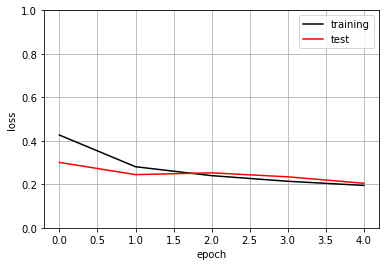

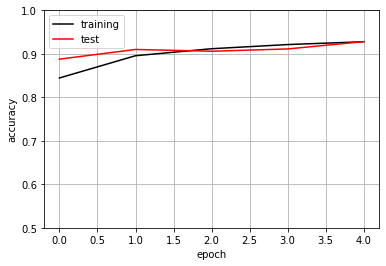

In [14]:
# 損失（誤り率）、正解率をグラフにする
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 訓練データの損失(誤り率)をプロット
plt.plot(history.history['loss'],
         label='training',
         color='black')
# テストデータの損失(誤り率)をプロット
plt.plot(history.history['val_loss'],
         label='test',
         color='red')
plt.ylim(0, 1)       # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル
plt.show()

# 訓練データの正解率をプロット
plt.plot(history.history['accuracy'],
         label='training',
         color='black')
# テストデータの正解率をプロット
plt.plot(history.history['val_accuracy'],
         label='test',
         color='red')
plt.ylim(0.5, 1)     # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('accuracy')    # y軸ラベル
plt.show()